# 1. Delivery Time

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stat
import pylab

In [2]:
delivery_data = pd.read_csv('delivery_time (1).csv')

In [3]:
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery_data.shape

(21, 2)

In [5]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

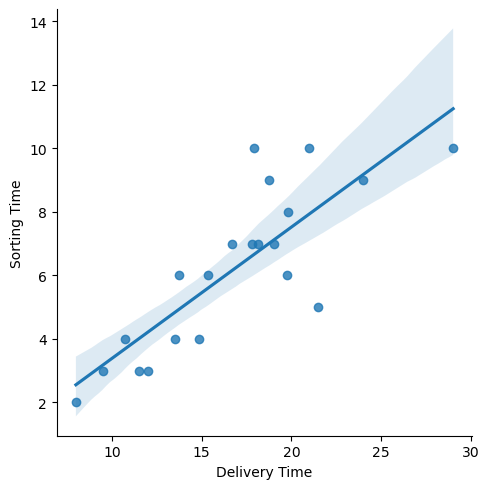

In [7]:
sns.lmplot(x='Delivery Time',y='Sorting Time',data=delivery_data)
plt.show()

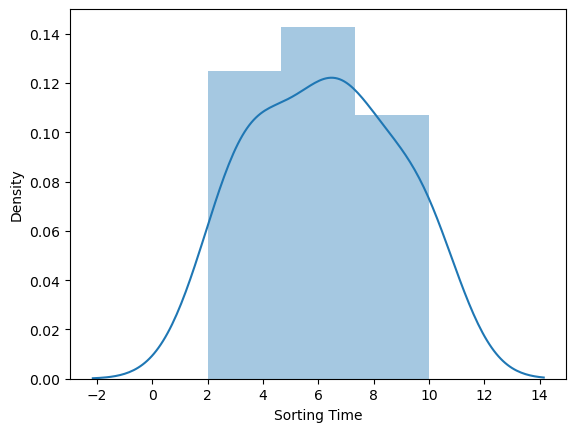

In [8]:
sns.distplot(delivery_data['Sorting Time'])
plt.show()

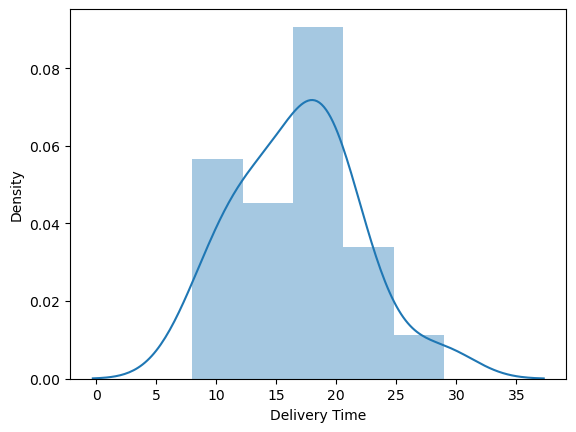

In [9]:
sns.distplot(delivery_data['Delivery Time'])
plt.show()

In [10]:
delivery_info = delivery_data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis='columns')


In [11]:
delivery_info

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
model1 = smf.ols(formula ='Delivery_Time~Sorting_Time' , data = delivery_info).fit()

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        12:07:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
data=pd.DataFrame({'Sorting_Time':[3,5]})
data


,Sorting_Time
0,3
1,5


In [17]:
model1.predict(data)

0    11.529794
1    14.827833
dtype: float64

In [18]:
model1.rsquared

0.6822714748417231

# Log Transformation.

In [21]:
delivery_info['Log_Sorting_Time'] = np.log(delivery_info['Sorting_Time'])

In [22]:
delivery_info

,Delivery_Time,Sorting_Time,Log_Sorting_Time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


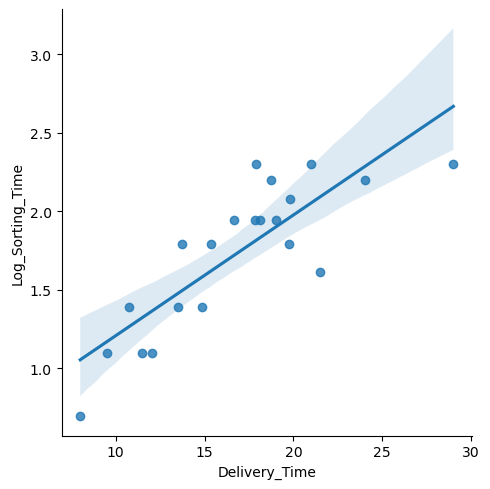

In [25]:
sns.lmplot(x = 'Delivery_Time', y = 'Log_Sorting_Time', data = delivery_info)
plt.show()

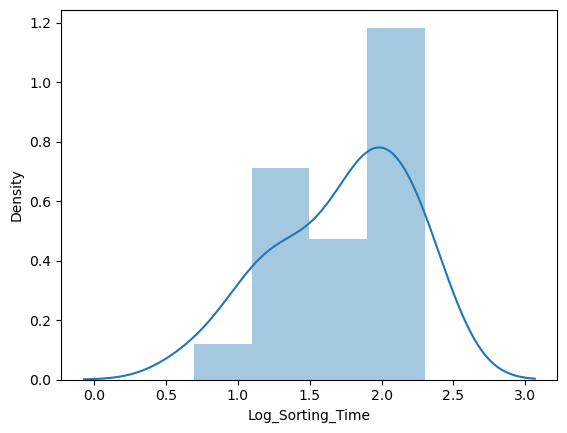

In [27]:
sns.distplot(delivery_info['Log_Sorting_Time'])
plt.show()

In [32]:
logmodel = smf.ols(formula = 'Delivery_Time~Log_Sorting_Time', data = delivery_info).fit()

In [33]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        12:20:17   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
Log_Sorting_Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
logmodel.rsquared

0.6954434611324223

# Sqrt Transformation

In [41]:
delivery_info['Sqrt_Sorting_time'] = np.sqrt(delivery_info['Sorting_Time'])

In [42]:
delivery_info

,Delivery_Time,Sorting_Time,Log_Sorting_Time,Sqrt_Sorting_time
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


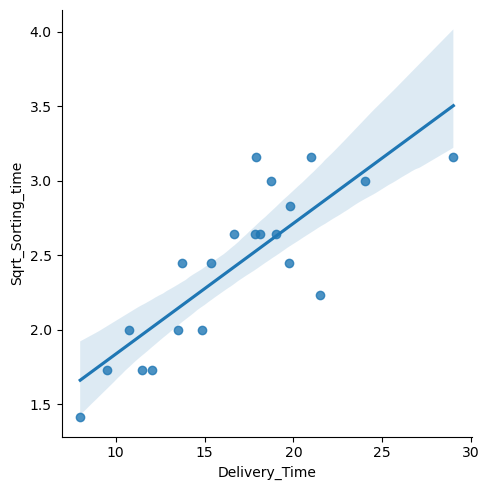

In [45]:
sns.lmplot(x = 'Delivery_Time', y = 'Sqrt_Sorting_time', data = delivery_info)
plt.show()

In [51]:
sqrtmodel = smf.ols(formula = 'Delivery_Time~Sqrt_Sorting_time', data = delivery_info).fit()

In [52]:
sqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.61e-06
Time:                        12:29:49   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
Sqrt_Sorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
sqrtmodel.rsquared

0.6958062276308671